In [1]:
#%pylab inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D




In [2]:
N = 29989

Nrnd = 20000  # Random Points
Nobs =  9989  # Halos, Observational Points

# Full Catalog (Random Points + Observations)
FC = np.loadtxt("FC_N20000_REAL.cat")

# Beta Skeleton from NGL lib
ngl_skel = np.loadtxt("FC_N20000_REAL_Beta1.0.bsk", dtype=int)
#skel_ngl = skel_ngl.astype(int)

# Beta Skeleton from Xiao-Dong Li
xdl_skel = np.loadtxt("XDL_600_neighbours/om0.2600_w-1.0000.BSKIndex", dtype=int)
#skel_xdl = skel_xdl.astype(int)

They have different shapes.

In [3]:
print( ngl_skel.shape, xdl_skel.shape )

(220448, 2) (110225, 2)


In [4]:
a = xdl_skel[:,0]
a = list(a)
b = xdl_skel[:,1]
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

xdl_skel = np.vstack((c,d)).T

In [5]:
xdl_skel.shape

(220450, 2)

Now they have the same shape. Lets check connection by connection.

In [6]:
matches = 0
missmatch = 0
missmatch_index = []

for i in range(N):
    
    
    index1 = np.where( xdl_skel[:,0] == i )[0]
    index2 = np.where( ngl_skel[:,0] == i )[0]
    
    listxdl = xdl_skel[index1,1]
    listxdl.sort()
    listngl = ngl_skel[index2,1]
    listngl.sort()
    
    try:
        aux = set(listxdl - listngl)
        matches += 1
    except:
        print( "MissMatch at index ", i) 
        print( "\tNGL:", listngl)
        print( "\tXDL:", listxdl)
        missmatch += 1
        missmatch_index.append( [[i], listxdl, listngl])
                
print( "Matches", matches )
print( "Missmatch", missmatch)

print( "Missmatch Index", missmatch_index )

MissMatch at index  6765
	NGL: [ 2331  9558 13677 15001]
	XDL: [ 2331  9558 12474 13677 15001]
MissMatch at index  12474
	NGL: [ 1403  9368 13677 23403]
	XDL: [ 1403  6765  9368 13677 23403]
Matches 29987
Missmatch 2
Missmatch Index [[[6765], array([ 2331,  9558, 12474, 13677, 15001]), array([ 2331,  9558, 13677, 15001])], [[12474], array([ 1403,  6765,  9368, 13677, 23403]), array([ 1403,  9368, 13677, 23403])]]


In [7]:
mm_index = []
xdl_index = []
ngl_index = []

for i in range(len(missmatch_index)):
    mm_index.append(missmatch_index[i][0][0])
    xdl_index.append(missmatch_index[i][1])
    ngl_index.append(missmatch_index[i][2])

In [8]:
mm_index = np.array(mm_index)

<IPython.core.display.Javascript object>


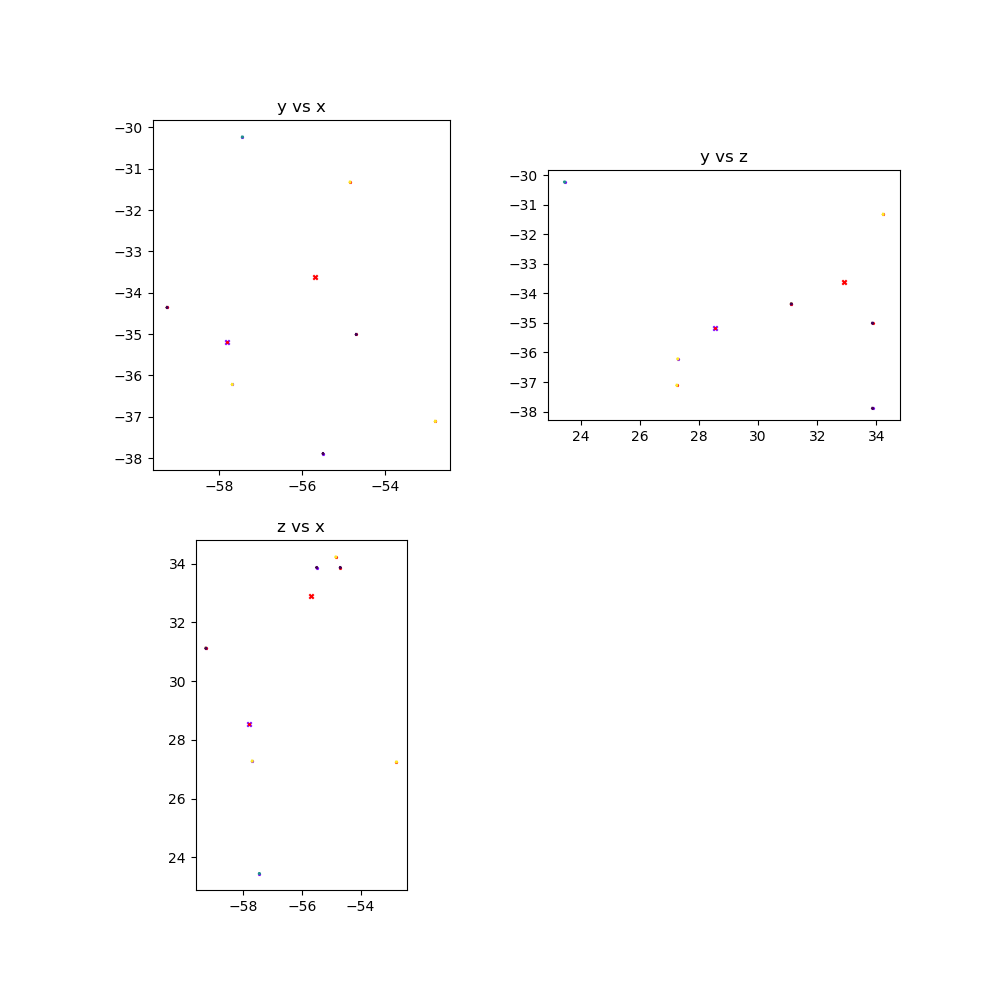

Text(0.5,1,'y vs z')

In [9]:
shift = 0

S0 = 10
S1 = 5
S2 = 5

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.set_aspect('equal')

colors = cm.rainbow( np.linspace(0,1, len(mm_index)) )

xmin = -75
xmax = +25
ymin = -50
ymax = 50
zmin = -50
zmax = 50

manualscale = False

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)   
plt.title("y vs x")



ax = fig.add_subplot(223)
ax.set_aspect('equal')
colors = cm.rainbow( np.linspace(0,1, len(mm_index)) )


for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Z, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, z, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, w, c=colors[i], s=S2, marker="2")

    
if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(zmin,zmax)
plt.title("z vs x")




ax = fig.add_subplot(222)
ax.set_aspect('equal')
colors = cm.rainbow( np.linspace(0,1, len(mm_index)) )


for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(Z, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(z, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(w, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(zmin,zmax)
    plt.ylim(ymin,ymax)  
plt.title("y vs z")



<IPython.core.display.Javascript object>


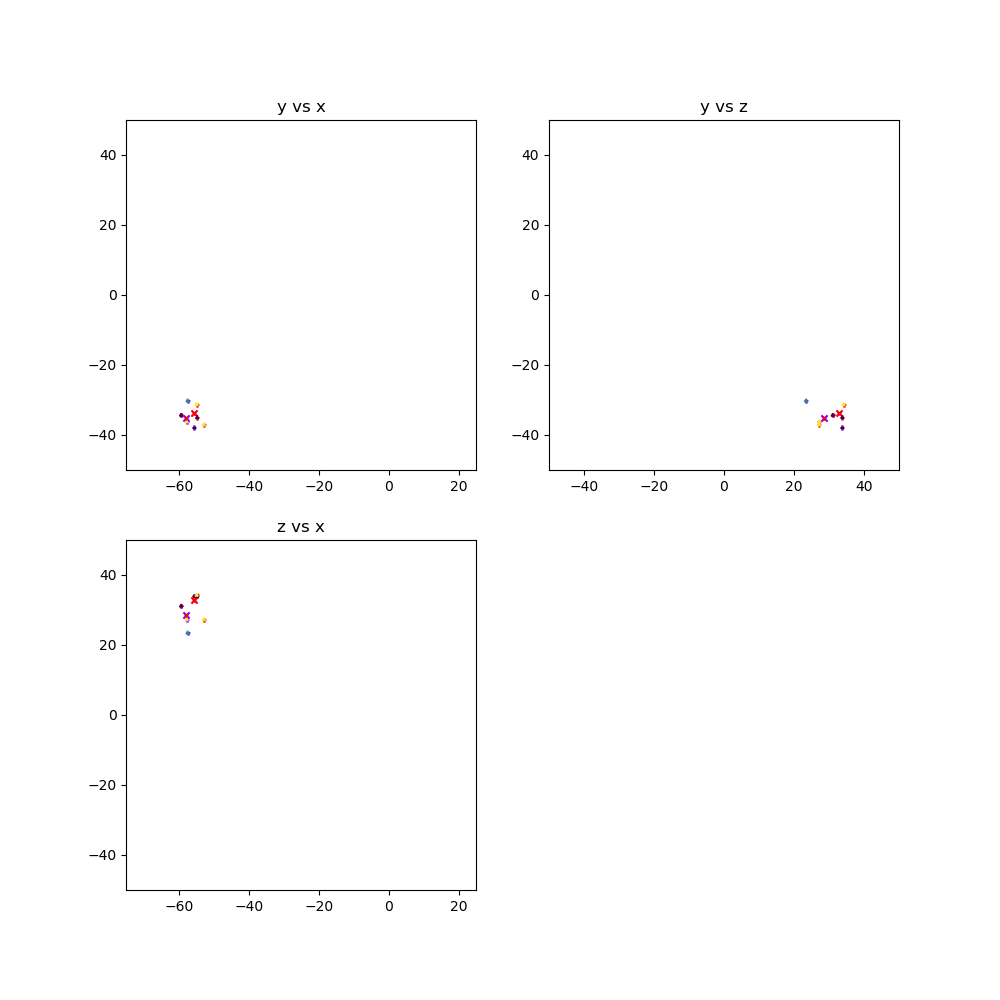

Text(0.5,1,'y vs z')

In [11]:
shift = 0

S0 = 20
S1 = 10
S2 = 10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.set_aspect('equal')

colors = cm.rainbow( np.linspace(0,1, len(mm_index)) )

xmin = -75
xmax = +25
ymin = -50
ymax = 50
zmin = -50
zmax = 50

manualscale = True

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)   
plt.title("y vs x")



ax = fig.add_subplot(223)
ax.set_aspect('equal')

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Z, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, z, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, w, c=colors[i], s=S2, marker="2")

    
if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(zmin,zmax)
plt.title("z vs x")




ax = fig.add_subplot(222)
ax.set_aspect('equal')


for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(Z, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(z, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(w, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(zmin,zmax)
    plt.ylim(ymin,ymax)  
plt.title("y vs z")



<IPython.core.display.Javascript object>


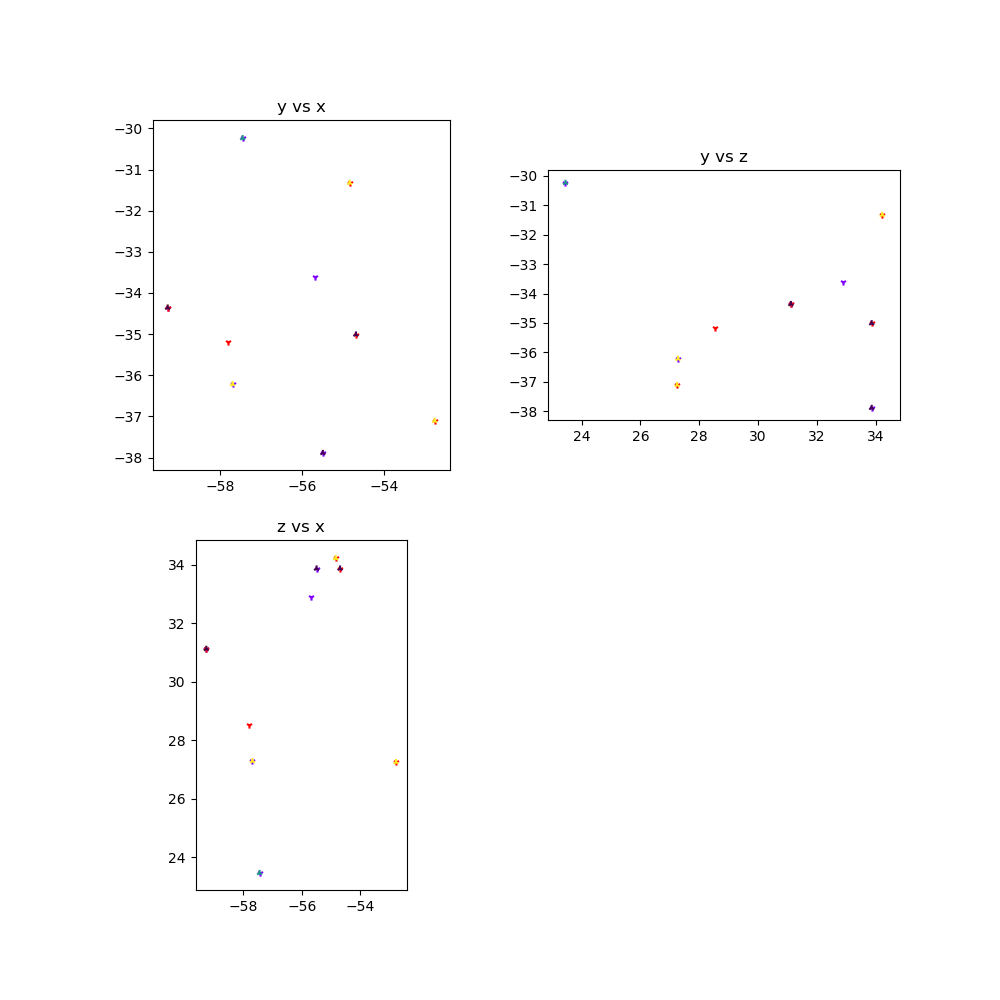

Text(0.5,1,'y vs z')

In [12]:
shift = 0

S0 = 0
S1 = 20
S2 = 20

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.set_aspect('equal')

colors = cm.rainbow( np.linspace(0,1, len(mm_index)) )

xmin = -75
xmax = +25
ymin = -50
ymax = 50
zmin = -50
zmax = 50

manualscale = False

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)   
plt.title("y vs x")



ax = fig.add_subplot(223)
ax.set_aspect('equal')

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Z, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(x, z, c=colors[i], s=S1, marker="1")    
    plt.scatter(u, w, c=colors[i], s=S2, marker="2")

    
if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(zmin,zmax)
plt.title("z vs x")




ax = fig.add_subplot(222)
ax.set_aspect('equal')


for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(Z, Y, c=colors[i], s=S0, marker="x", label = "Outliers")
    plt.scatter(z, y, c=colors[i], s=S1, marker="1")    
    plt.scatter(w, v, c=colors[i], s=S2, marker="2")

if(manualscale):
    plt.xlim(zmin,zmax)
    plt.ylim(ymin,ymax)  
plt.title("y vs z")



<IPython.core.display.Javascript object>


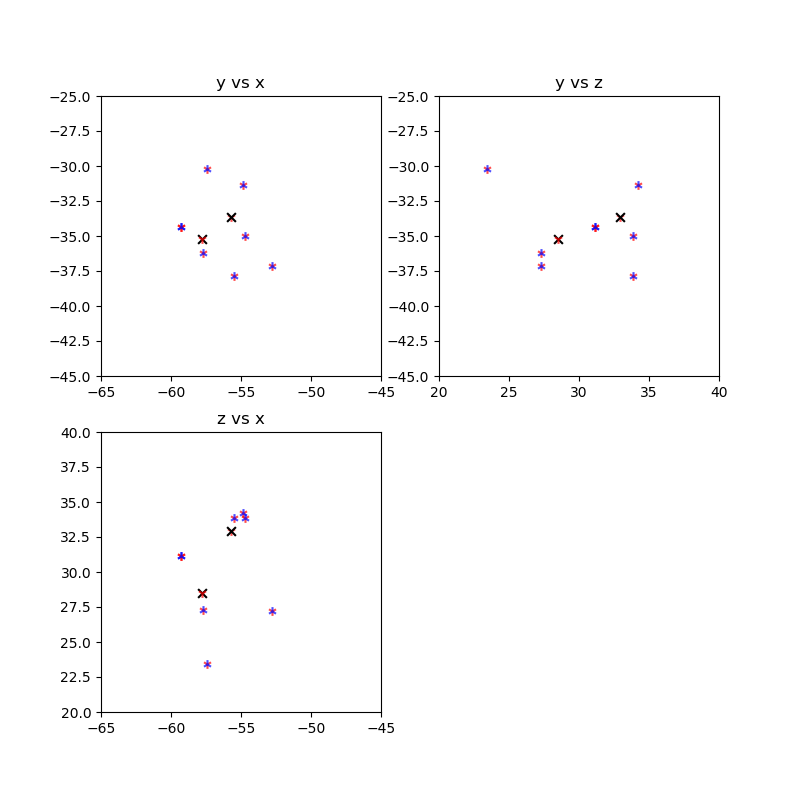

In [18]:
shift = 0

S0 = 40
S1 = 40
S2 = 40

alpha=0.7
alpha1=1.0

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
ax.set_aspect('equal')

colors = ["black","red","blue"]

xmin = -65
xmax = -45
ymin = -45
ymax = -25
zmin = 20
zmax = 40

manualscale = True

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Y, c=colors[0], s=S0, alpha=alpha1, marker="x", label = "Outliers")
    plt.scatter(x, y, c=colors[1], s=S1, alpha=alpha, marker="1")    
    plt.scatter(u, v, c=colors[2], s=S2, alpha=alpha, marker="2")

if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)   
plt.title("y vs x")



ax = fig.add_subplot(223)
ax.set_aspect('equal')

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Z, c=colors[0], alpha=alpha1, s=S0, marker="x", label = "Outliers")
    plt.scatter(x, z, c=colors[1], alpha=alpha, s=S1, marker="1")    
    plt.scatter(u, w, c=colors[2], alpha=alpha, s=S2, marker="2")

    
if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(zmin,zmax)
plt.title("z vs x")




ax = fig.add_subplot(222)
ax.set_aspect('equal')


for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(Z, Y, c=colors[0], alpha=alpha1, s=S0, marker="x", label = "Outliers")
    plt.scatter(z, y, c=colors[1], alpha=alpha, s=S1, marker="1")    
    plt.scatter(w, v, c=colors[2], alpha=alpha, s=S2, marker="2")

if(manualscale):
    plt.xlim(zmin,zmax)
    plt.ylim(ymin,ymax)  
plt.title("y vs z")

plt.savefig("extra_connection.pdf", format="pdf")


<IPython.core.display.Javascript object>


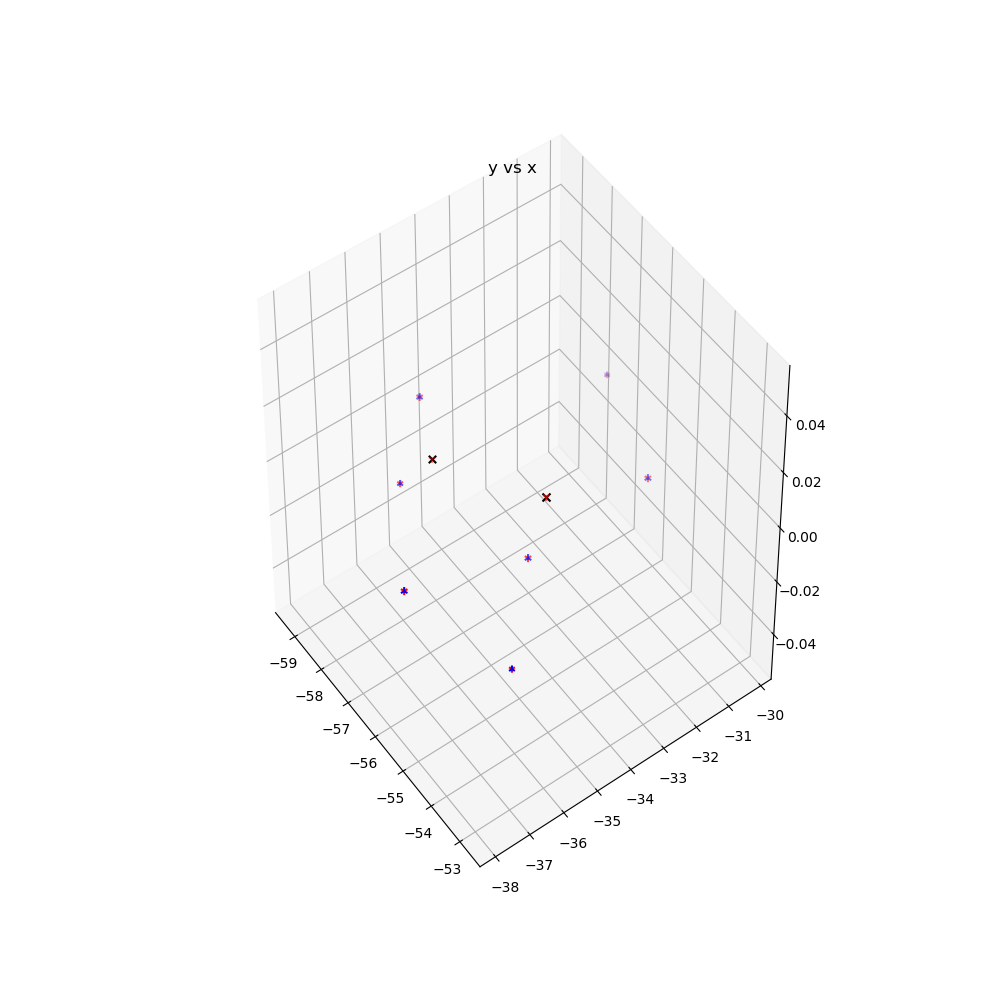

Text(0.5,0.92,'y vs x')

In [24]:
shift = 0

S0 = 40
S1 = 40
S2 = 40

alpha=0.7
alpha1=0.5

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.set_aspect('equal')

colors = ["black","red","blue"]

xmin = -75
xmax = +25
ymin = -50
ymax = 50
zmin = -50
zmax = 50

manualscale = False

for i in range(len(mm_index) ):
    X = FC[mm_index[i] - shift,0]
    Y = FC[mm_index[i] - shift,1]
    Z = FC[mm_index[i] - shift,2]
    
    x = FC[xdl_index[i],0]
    y = FC[xdl_index[i],1]
    z = FC[xdl_index[i],2]
    
    u = FC[ngl_index[i],0]
    v = FC[ngl_index[i],1]
    w = FC[ngl_index[i],2] 
    
    plt.scatter(X, Y, Z, c=colors[0], marker="x")
    plt.scatter(x, y, z, c=colors[1], marker="1")    
    plt.scatter(u, v, w, c=colors[2], marker="2")
"""
    plt.scatter(X, Y, Z, c=colors[0], s=S0, alpha=alpha1, marker="x", label = "Outliers")
    plt.scatter(x, y, z, c=colors[1], s=S1, alpha=alpha, marker="1")    
    plt.scatter(u, v, w, c=colors[2], s=S2, alpha=alpha, marker="2")
"""

    
    
if(manualscale):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
plt.title("y vs x")